In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

# import logging
# logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
X = np.load("data/X.npy")
y = np.load("data/y.npy")

In [3]:
m, n = X.shape # 5000 eg's, 400 params, 10 possible outputs

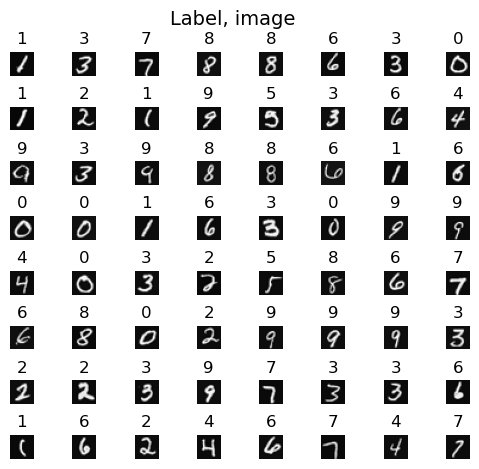

In [4]:
# m = Sequential(Dense()) 
fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5
# widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [5]:
model = Sequential([
    InputLayer((400,)),
    Dense(25, activation='relu', name='L1'),
    Dense(10, activation='linear', name='L2'),
], name="my_model")

In [6]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))
history = model.fit(X, y, epochs=40)

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 1.3195
Epoch 2/40
157/157 [==============================] - 0s 1ms/step - loss: 0.5485
Epoch 3/40
157/157 [==============================] - 0s 1ms/step - loss: 0.4043
Epoch 4/40
157/157 [==============================] - 0s 1ms/step - loss: 0.3455
Epoch 5/40
157/157 [==============================] - 0s 1ms/step - loss: 0.3106
Epoch 6/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2847
Epoch 7/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2678
Epoch 8/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2520
Epoch 9/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2401
Epoch 10/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2288
Epoch 11/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2177
Epoch 12/40
157/157 [==============================] - 0s 1ms/step - loss: 0.2068
Epoch 13/40
157/157 [====

In [7]:
y_pred = np.argmax(model.predict(X), axis=1).reshape(-1, 1)


157/157 [==============================] - 0s 803us/step


In [8]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y, y_pred))
print(classification_report(y, y_pred, zero_division=1))

[[499   0   0   0   0   0   0   0   1   0]
 [  0 498   0   0   0   1   0   0   1   0]
 [  1   1 496   0   0   0   0   1   1   0]
 [  0   2   1 488   1   4   0   2   1   1]
 [  0   1   0   0 497   0   0   1   0   1]
 [  0   0   1   5   1 492   0   0   1   0]
 [  0   1   0   0   0   0 499   0   0   0]
 [  0   2   1   0   0   0   0 496   0   1]
 [  0   4   2   3   0   1   0   0 490   0]
 [  1   2   0   3   1   0   0   1   0 492]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       0.97      1.00      0.99       500
           2       0.99      0.99      0.99       500
           3       0.98      0.98      0.98       500
           4       0.99      0.99      0.99       500
           5       0.99      0.98      0.99       500
           6       1.00      1.00      1.00       500
           7       0.99      0.99      0.99       500
           8       0.99      0.98      0.98       500
           9       0.99     

In [9]:
def display_digit(X):
    """ display a single digit. The input is one digit (400,). """
    fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    X_reshaped = X.reshape((20,20)).T
    # Display the image
    ax.imshow(X_reshaped, cmap='gray')
    plt.show()


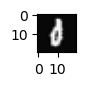

0 - Actual: [0]  Predicted: [8]


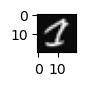

1 - Actual: [1]  Predicted: [8]


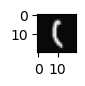

2 - Actual: [1]  Predicted: [5]


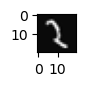

3 - Actual: [2]  Predicted: [1]


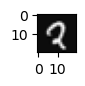

4 - Actual: [2]  Predicted: [7]


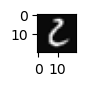

5 - Actual: [2]  Predicted: [0]


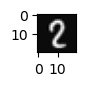

6 - Actual: [2]  Predicted: [8]


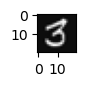

7 - Actual: [3]  Predicted: [5]


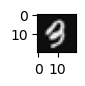

8 - Actual: [3]  Predicted: [8]


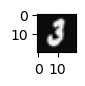

9 - Actual: [3]  Predicted: [2]


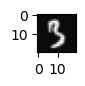

10 - Actual: [3]  Predicted: [5]


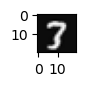

11 - Actual: [3]  Predicted: [7]


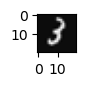

12 - Actual: [3]  Predicted: [1]


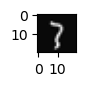

13 - Actual: [3]  Predicted: [7]


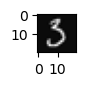

14 - Actual: [3]  Predicted: [5]


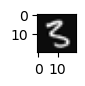

15 - Actual: [3]  Predicted: [5]


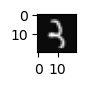

16 - Actual: [3]  Predicted: [4]


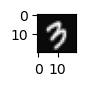

17 - Actual: [3]  Predicted: [9]


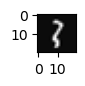

18 - Actual: [3]  Predicted: [1]


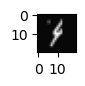

19 - Actual: [4]  Predicted: [1]


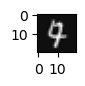

20 - Actual: [4]  Predicted: [7]


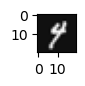

21 - Actual: [4]  Predicted: [9]


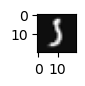

22 - Actual: [5]  Predicted: [3]


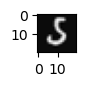

23 - Actual: [5]  Predicted: [3]


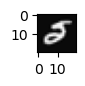

24 - Actual: [5]  Predicted: [2]


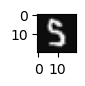

25 - Actual: [5]  Predicted: [3]


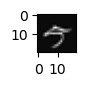

26 - Actual: [5]  Predicted: [4]


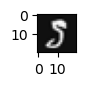

27 - Actual: [5]  Predicted: [3]


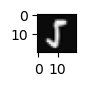

28 - Actual: [5]  Predicted: [3]


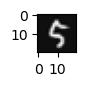

29 - Actual: [5]  Predicted: [8]


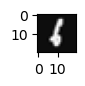

30 - Actual: [6]  Predicted: [1]


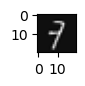

31 - Actual: [7]  Predicted: [9]


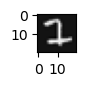

32 - Actual: [7]  Predicted: [2]


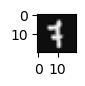

33 - Actual: [7]  Predicted: [1]


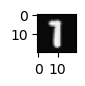

34 - Actual: [7]  Predicted: [1]


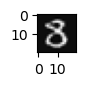

35 - Actual: [8]  Predicted: [3]


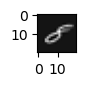

36 - Actual: [8]  Predicted: [5]


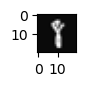

37 - Actual: [8]  Predicted: [1]


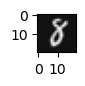

38 - Actual: [8]  Predicted: [2]


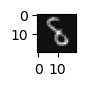

39 - Actual: [8]  Predicted: [1]


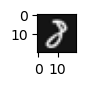

40 - Actual: [8]  Predicted: [3]


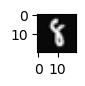

41 - Actual: [8]  Predicted: [1]


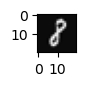

42 - Actual: [8]  Predicted: [1]


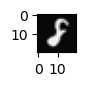

43 - Actual: [8]  Predicted: [2]


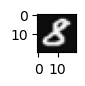

44 - Actual: [8]  Predicted: [3]


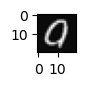

45 - Actual: [9]  Predicted: [0]


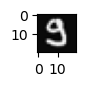

46 - Actual: [9]  Predicted: [3]


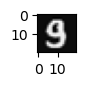

47 - Actual: [9]  Predicted: [3]


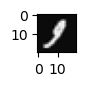

48 - Actual: [9]  Predicted: [1]


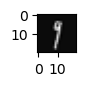

49 - Actual: [9]  Predicted: [1]


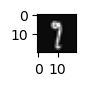

50 - Actual: [9]  Predicted: [7]


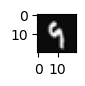

51 - Actual: [9]  Predicted: [4]


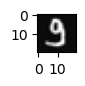

52 - Actual: [9]  Predicted: [3]


In [ ]:
# checking all incorrect predictions

istrue = (y == y_pred)
count = 0
for i in range(len(istrue.flatten())):
    if (istrue[i] == False):
        display_digit(X[i])
        print(count, '- Actual:', y[i], ' Predicted:', y_pred[i])
        count+=1